# Base de datos compañia de inmuebles

In [43]:
#importamos la libreria pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

In [4]:
# importamos el fichero 
data = pd.read_excel('data.xlsx',usecols="B:AA",skiprows=4,nrows=267)

## Limpiaza de datos

In [5]:
# Borrar columnas que no se utilizará
del(data['Unnamed: 10'],data['Intervalo'])

In [6]:
# Borrando filas con datos faltantes 
data = data.dropna(0)

In [7]:
# De float a Int
data = data.astype({'Año de la venta':int,'Mes de la venta':int,'Y':int,'M':int,'D':int,'# de propiedad':int,'Satisfacción con el trato':int,'Edad al momento de compra':int})

## ¿Que grupo de personas son más propensas de comprar el producto?

In [8]:
# Podemos ver que los datos obtenidos son sesgados ya que el nombre de la persona que compro no siempre es el único que vivirá o compro el producto
pd.value_counts(data['Género'])

M    99
F    65
Name: Género, dtype: int64

Text(0, 0.5, 'Frecuencia')

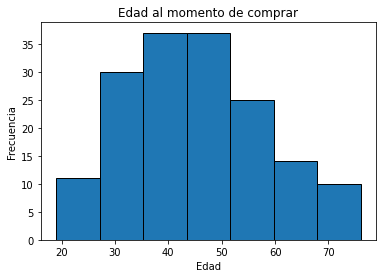

In [9]:
# Graficamos una distribución de frecuencias de las edad
plt.hist(data['Edad al momento de compra'],bins=7,ec='black')
plt.title('Edad al momento de comprar')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

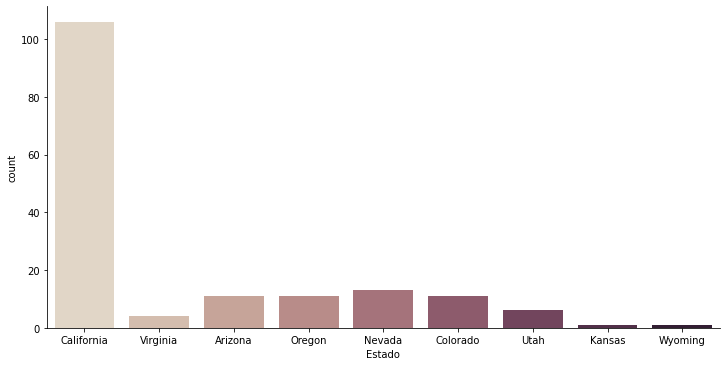

In [22]:
# Histograma de clientes por región
sns.catplot(x='Estado',kind='count',data=data,palette='ch:.25',aspect=2)

In [32]:
#Tabla de frecuencuas 
frec = pd.value_counts(data['Estado'])
frec_df=pd.DataFrame(frec)
frec_df.columns = ['frec_abs']
frec_df['frec_%']=100*frec_df['frec_abs']/len(data['Estado'])
frec_rel_val = frec_df['frec_%'].values
acum = []
valor_acum = 0
for i in frec_rel_val:
    valor_acum = valor_acum + i
    acum.append(valor_acum)
frec_df['Frec_%_acum']=acum
frec_df

,frec_abs,frec_%,Frec_%_acum
California,106,64.634146,64.634146
Nevada,13,7.926829,72.560976
Arizona,11,6.707317,79.268293
Colorado,11,6.707317,85.975610
Oregon,11,6.707317,92.682927
Utah,6,3.658537,96.341463
Virginia,4,2.439024,98.780488
Kansas,1,0.609756,99.390244
Wyoming,1,0.609756,100.000000


/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


[Text(0, 0, 'California'),
 Text(1, 0, 'Nevada'),
 Text(2, 0, 'Arizona'),
 Text(3, 0, 'Colorado'),
 Text(4, 0, 'Oregon'),
 Text(5, 0, 'Utah'),
 Text(6, 0, 'Virginia'),
 Text(7, 0, 'Kansas'),
 Text(8, 0, 'Wyoming')]

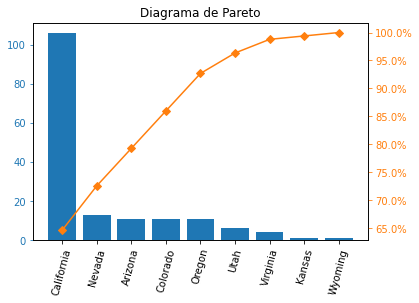

In [53]:
# Diagrama de pareto
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title('Diagrama de Pareto')
ax.bar(frec_df.index,frec_df['frec_abs'],color='C0')
ax2 = ax.twinx()
ax2.plot(frec_df.index, frec_df['Frec_%_acum'],color='C1',marker ='D',ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y',colors='C0')
ax2.tick_params(axis='y',colors='C1')
ax.set_xticklabels(frec_df.index,rotation=75)

In [466]:
#calculamos la media de la edad
data['Edad al momento de compra'].mean()

45.457317073170735

In [467]:
#calculamos la mediana de la edad
data['Edad al momento de compra'].median()

44.0

In [468]:
#Calculamos la moda de la edad
data['Edad al momento de compra'].mode()

0    48
dtype: int64

In [480]:
#calculamos la varianza
data['Edad al momento de compra'].var()

163.93068232829566

In [481]:
#calculamos la desviación estandar
data['Edad al momento de compra'].std()

12.803541788438684

/home/fode/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


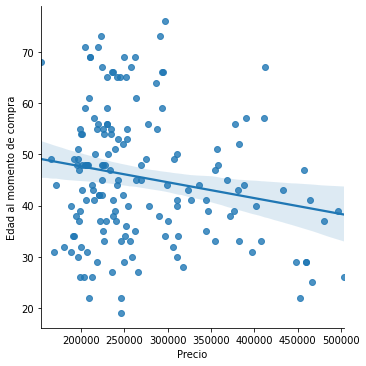

In [484]:
# relacion entre la edad y el precio
sns.lmplot('Precio','Edad al momento de compra',data=data)

In [486]:
# Calculamos la covarianza
data[['Precio','Edad al momento de compra']].cov()

,Precio,Edad al momento de compra
Precio,6.190989e+09,-191568.967380
Edad al momento de compra,-1.915690e+05,163.930682


In [487]:
data[['Precio','Edad al momento de compra']].corr()

,Precio,Edad al momento de compra
Precio,1.000000,-0.190158
Edad al momento de compra,-0.190158,1.000000


## Conclusión

- Es mas común o probable que los hombres firmen contratos y son potencialmente una mejor audiencia para nuestros anuncios.
- El 65% de nuestras ventas procedian de California
- La edad media de clientes es de 45 años y una desviación estadar de 13 años. Los jovenes comprar más propiedades que los mayores.